# rodar

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sloan_table = pd.read_csv('/content/drive/MyDrive/Metedologia TCC/Sloan/SDSS_DR18.csv');

In [ ]:
sloan_table.head(2000)

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.240000e+18,5.260000e+17,130.852163,0.951573,18.59335,16.53429,15.48791,14.98926,14.61014,1239,...,19.14614,17.14951,16.84974,0.724870,0.939695,0.965371,0.928206,0.883583,0.096327,GALAXY
1996,1.240000e+18,4.290000e+18,131.078028,0.886101,18.64174,18.91801,19.41393,19.77970,20.10166,1239,...,18.92230,19.77762,20.08179,0.301126,0.345711,0.403563,0.471145,0.050000,0.000158,STAR
1997,1.240000e+18,1.410000e+19,131.098579,0.912649,19.15671,18.22034,17.92332,17.79087,17.73026,1239,...,18.22695,17.79704,17.74450,0.912668,0.297803,0.249946,0.739419,0.289048,0.000036,STAR
1998,1.240000e+18,1.410000e+19,131.145721,0.921603,18.01667,17.71583,17.63513,17.56084,17.53474,1239,...,17.73341,17.56756,17.54293,0.936394,0.304787,0.999905,0.501219,0.828048,0.439349,QSO


In [ ]:
set(sloan_table['class'])

{'GALAXY', 'QSO', 'STAR'}

In [ ]:
sloan_qso_star = sloan_table[sloan_table['class']!='GALAXY']
sloan_qso_star[['objid','specobjid', 'redshift','run','mjd','field','psfMag_u','psfMag_r','psfMag_g','psfMag_i','class']].head(2000)

,objid,specobjid,redshift,run,mjd,field,psfMag_u,psfMag_r,psfMag_g,psfMag_i,class
1,1.240000e+18,3.250000e+17,-0.000814,756,51990,467,19.58945,20.34491,19.92417,20.65535,STAR
3,1.240000e+18,2.880000e+18,0.000087,756,54140,467,19.49706,17.42272,17.96176,17.21564,STAR
4,1.240000e+18,2.880000e+18,0.000018,756,54140,467,18.33505,16.28580,16.85104,16.08275,STAR
5,1.240000e+18,2.880000e+18,-0.000087,756,54140,467,18.85644,17.04058,17.56266,16.85547,STAR
6,1.240000e+18,2.880000e+18,-0.000091,756,54140,467,18.87258,16.55469,17.19053,16.33012,STAR
...,...,...,...,...,...,...,...,...,...,...,...
3022,1.240000e+18,3.710000e+18,-0.000342,1453,54939,88,19.49595,17.91023,18.30163,17.78140,STAR
3024,1.240000e+18,3.710000e+18,-0.001012,1453,54939,88,19.53688,18.19801,18.62260,18.01321,STAR
3025,1.240000e+18,9.610000e+18,-0.001236,1453,58017,88,18.82271,17.55840,17.87434,17.47531,STAR
3027,1.240000e+18,7.110000e+17,1.792486,1453,52079,88,18.98134,18.77254,18.82094,18.52956,QSO


In [ ]:
sloan_qso_star.columns


Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'],
      dtype='object')

In [ ]:
table_qso_str=sloan_qso_star[['objid','specobjid', "field",'redshift','ra', 'dec','u','g','r','i','z','petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z','petroFlux_u','petroFlux_g','petroFlux_i','petroFlux_r','petroFlux_z','petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z','psfMag_u','psfMag_r','psfMag_g','psfMag_i','psfMag_z','expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z','class']]
table_qso_str.head(2000)

,objid,specobjid,field,redshift,ra,dec,u,g,r,i,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class
1,1.240000e+18,3.250000e+17,467,-0.000814,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,...,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,STAR
3,1.240000e+18,2.880000e+18,467,0.000087,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,...,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,STAR
4,1.240000e+18,2.880000e+18,467,0.000018,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,...,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,STAR
5,1.240000e+18,2.880000e+18,467,-0.000087,185.739708,0.746348,18.85838,17.55346,17.04644,16.84854,...,17.04058,17.56266,16.85547,16.76903,0.862006,0.823431,0.416351,0.654899,0.992346,STAR
6,1.240000e+18,2.880000e+18,467,-0.000091,185.713224,0.735222,18.85089,17.18911,16.54595,16.32198,...,16.55469,17.19053,16.33012,16.21988,0.999877,0.971989,0.050000,0.199957,0.636992,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,1.240000e+18,3.710000e+18,88,-0.000342,253.611045,42.687576,19.48895,18.31287,17.90935,17.77170,...,17.91023,18.30163,17.78140,17.70962,0.474987,0.114872,0.711518,0.838791,0.800168,STAR
3024,1.240000e+18,3.710000e+18,88,-0.001012,253.614193,42.778734,19.55022,18.61949,18.20971,18.02489,...,18.19801,18.62260,18.01321,17.94631,0.349368,0.985578,0.599753,0.712441,0.102048,STAR
3025,1.240000e+18,9.610000e+18,88,-0.001236,253.590463,42.645368,18.80722,17.87336,17.55408,17.45890,...,17.55840,17.87434,17.47531,17.40719,0.697058,0.999927,0.919724,0.409040,0.966345,STAR
3027,1.240000e+18,7.110000e+17,88,1.792486,253.583323,42.721371,19.00287,18.82101,18.77536,18.52672,...,18.77254,18.82094,18.52956,18.48733,0.680564,0.999722,0.323340,0.893222,0.892314,QSO


In [ ]:
objetos = list(set(table_qso_str['specobjid']))

In [ ]:
obj = list(set(table_qso_str[['objid','specobjid']]))

In [ ]:
#table_qso_str[table_qso_str['specobjid'] == objetos[0]]

In [ ]:
classes = list(set(table_qso_str['class']))
classes

['STAR', 'QSO']

In [ ]:

table_qso = table_qso_str[table_qso_str['class'] == classes[1]]
print(f'numero de quasares: {len(table_qso)}')

numero de quasares: 10425


# Analise da tabela de estrela e quasar

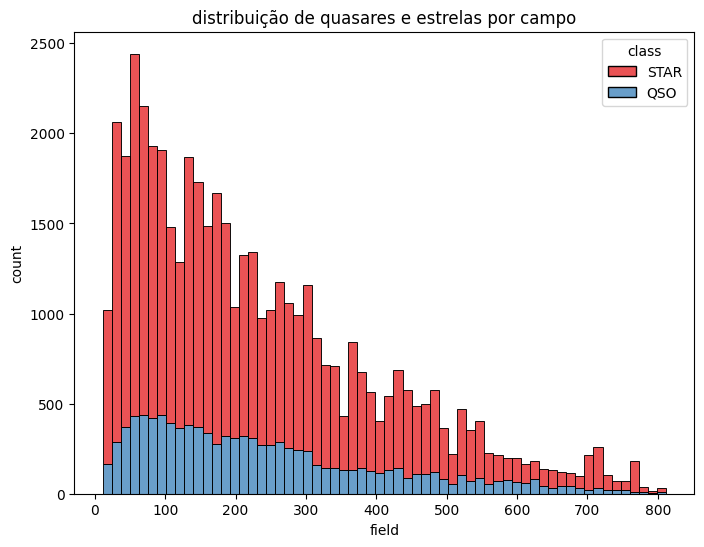

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=table_qso_str, x='field', hue='class', multiple='stack', palette='Set1')
plt.xlabel('field')
plt.ylabel('count')
plt.title('distribuição de quasares e estrelas por campo')
plt.show()

## graficos redshfit

### psfmag

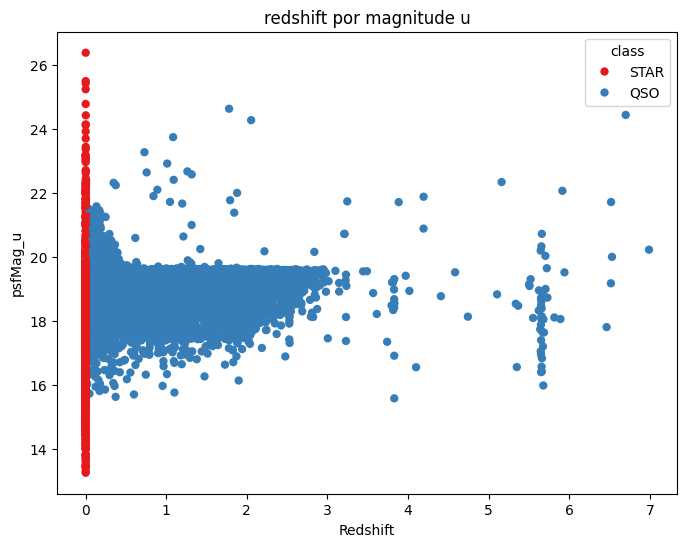

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='psfMag_u', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('psfMag_u')
plt.title('redshift por magnitude u')
plt.show()

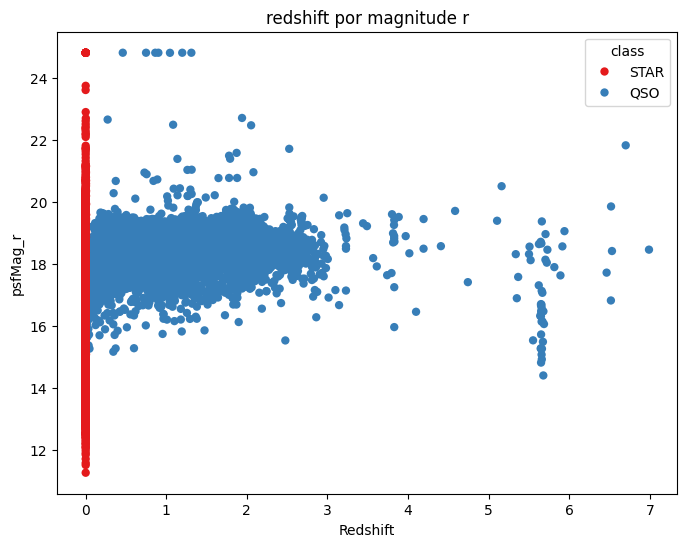

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='psfMag_r', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('psfMag_r')
plt.title('redshift por magnitude r')
plt.show()

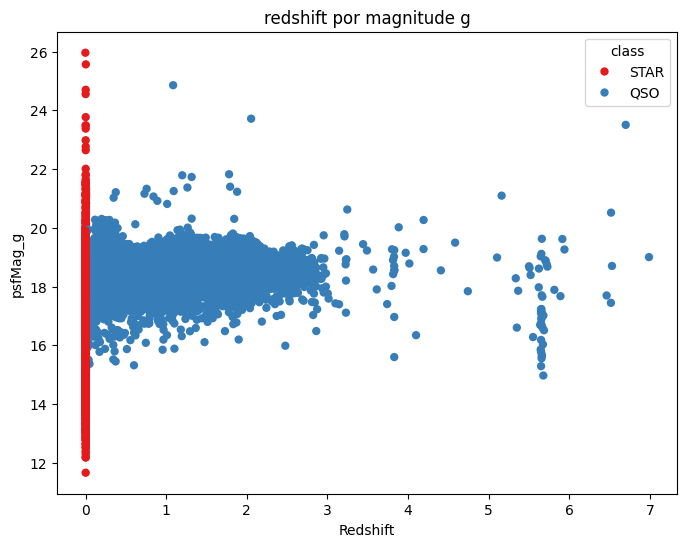

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='psfMag_g', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('psfMag_g')
plt.title('redshift por magnitude g')
plt.show()

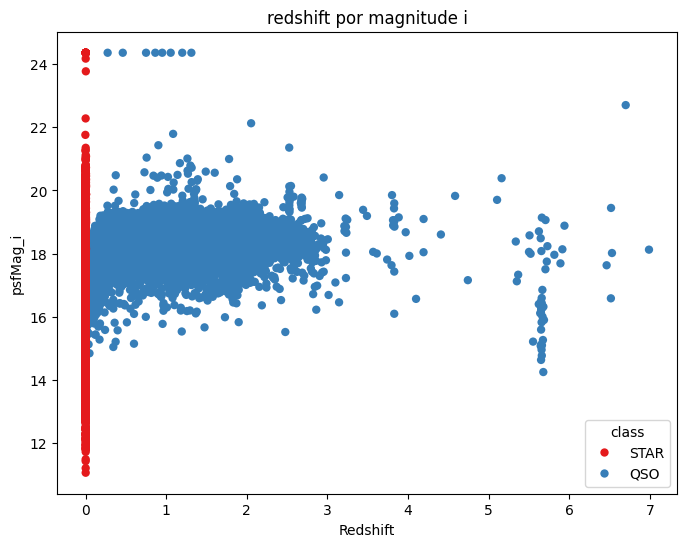

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='psfMag_i', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('psfMag_i')
plt.title('redshift por magnitude i')
plt.show()

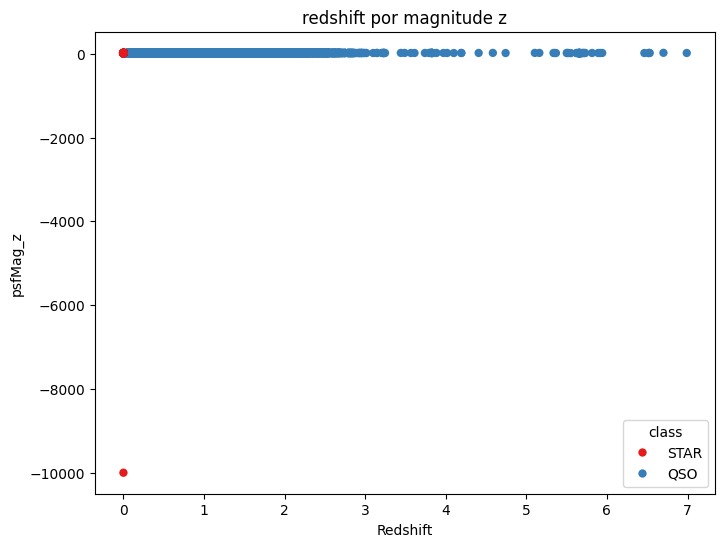

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='psfMag_z', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('psfMag_z')
plt.title('redshift por magnitude z')
plt.show()

In [ ]:
list(sloan_qso_star.columns)

['objid',
 'specobjid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'plate',
 'mjd',
 'fiberid',
 'petroRad_u',
 'petroRad_g',
 'petroRad_i',
 'petroRad_r',
 'petroRad_z',
 'petroFlux_u',
 'petroFlux_g',
 'petroFlux_i',
 'petroFlux_r',
 'petroFlux_z',
 'petroR50_u',
 'petroR50_g',
 'petroR50_i',
 'petroR50_r',
 'petroR50_z',
 'psfMag_u',
 'psfMag_r',
 'psfMag_g',
 'psfMag_i',
 'psfMag_z',
 'expAB_u',
 'expAB_g',
 'expAB_r',
 'expAB_i',
 'expAB_z',
 'redshift',
 'class']

### petroFlux

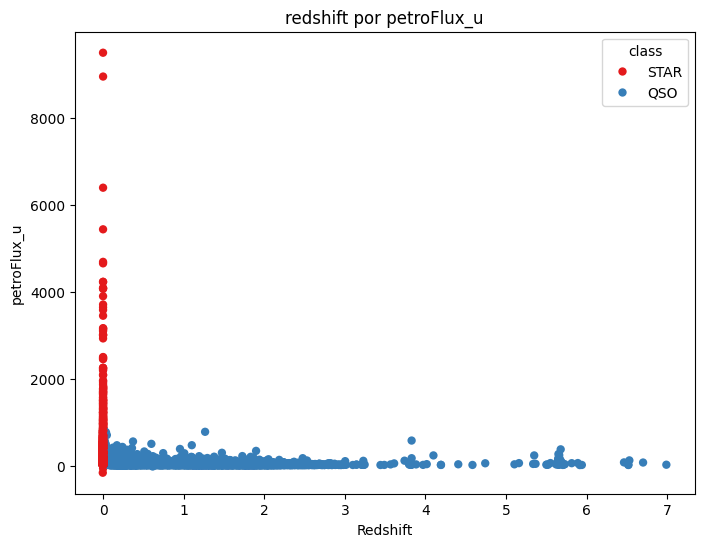

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='petroFlux_u', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('petroFlux_u')
plt.title('redshift por petroFlux_u')
plt.show()

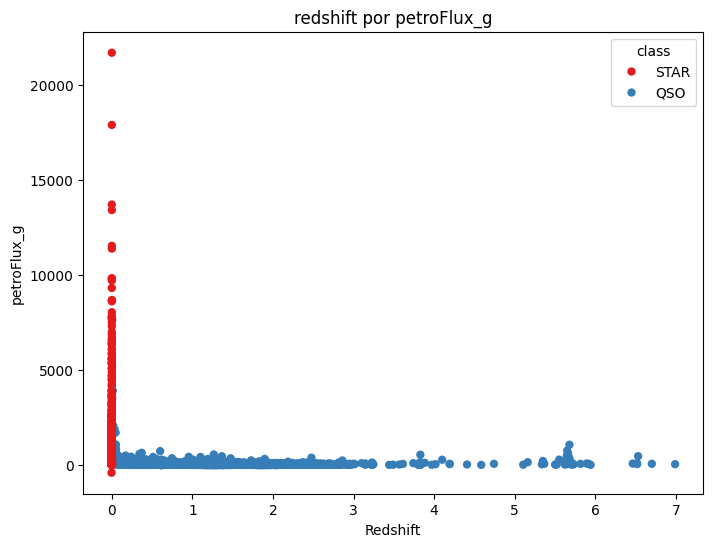

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='petroFlux_g', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('petroFlux_g')
plt.title('redshift por petroFlux_g')
plt.show()

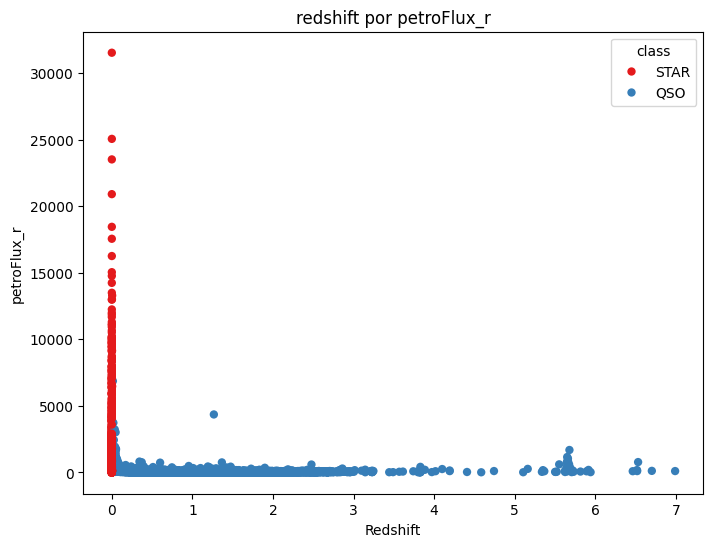

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='petroFlux_r', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('petroFlux_r')
plt.title('redshift por petroFlux_r')
plt.show()

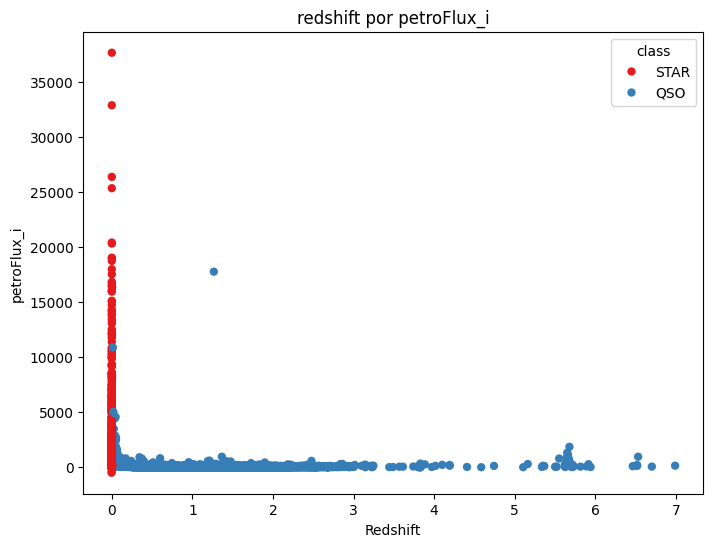

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='petroFlux_i', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('petroFlux_i')
plt.title('redshift por petroFlux_i')
plt.show()

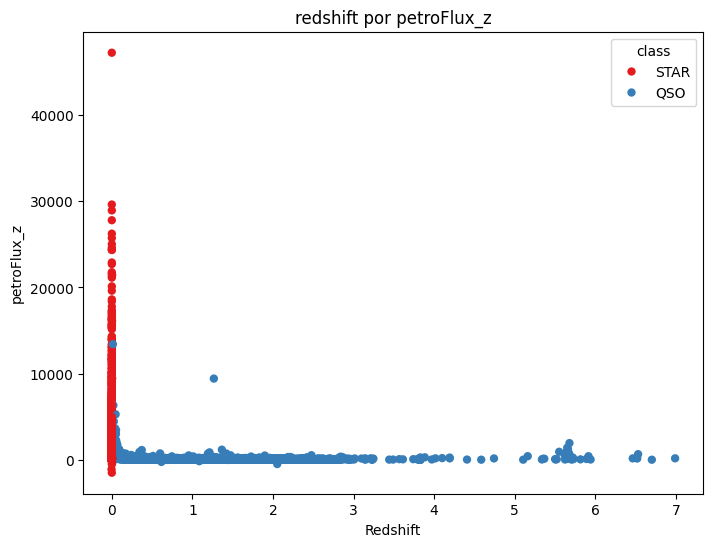

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='petroFlux_z', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('Redshift')
plt.ylabel('petroFlux_z')
plt.title('redshift por petroFlux_z')
plt.show()

## garficos petroFlux_u

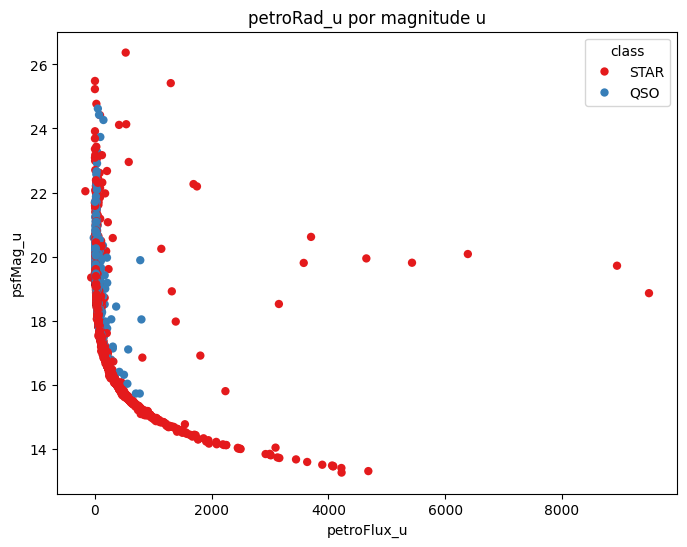

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petroFlux_u', y='psfMag_u', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('petroFlux_u')
plt.ylabel('psfMag_u')
plt.title('petroRad_u por magnitude u')
plt.show()

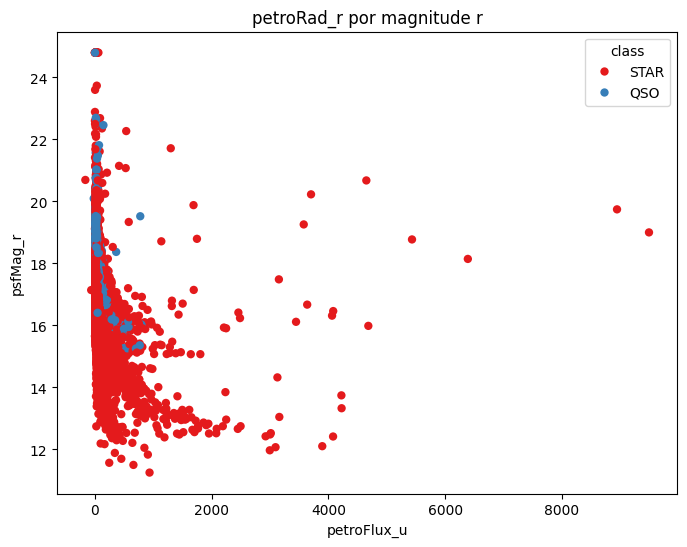

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petroFlux_u', y='psfMag_r', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('petroFlux_u')
plt.ylabel('psfMag_r')
plt.title('petroRad_r por magnitude r')
plt.show()

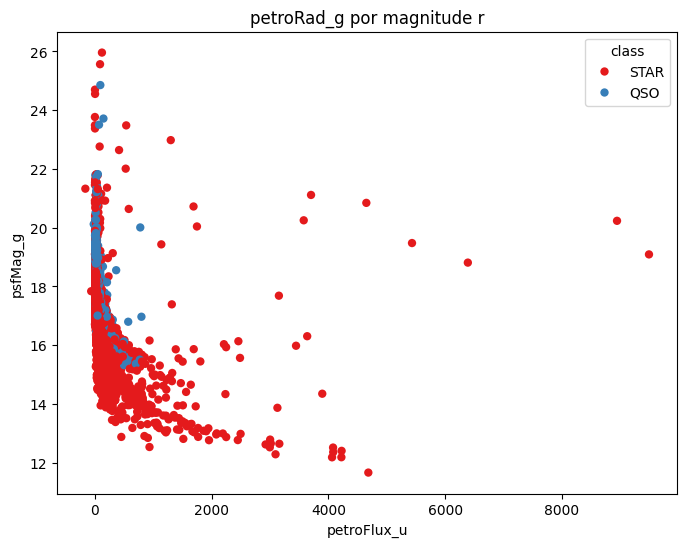

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petroFlux_u', y='psfMag_g', hue='class', data=table_qso_str, palette='Set1', edgecolor='none')
plt.xlabel('petroFlux_u')
plt.ylabel('psfMag_g')
plt.title('petroRad_g por magnitude r')
plt.show()

# Analise da tabela de estrelas

In [ ]:
table_star = table_qso_str[table_qso_str['class'] == classes[1]]
print(f'numero de estrelas: {len(table_star)}')

numero de estrelas: 10425


## redshift em relação a maginitudes

<ipython-input-29-05dd0dc719d5>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_u', y='redshift', data=table_star, palette='Set1', edgecolor='none')


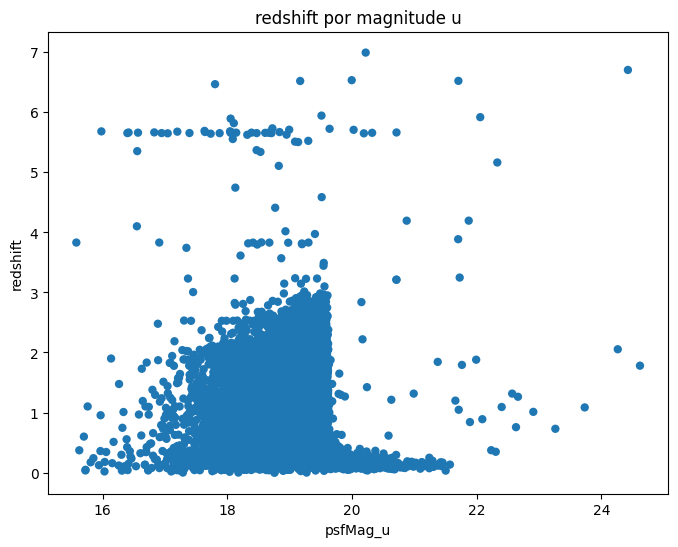

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_u', y='redshift', data=table_star, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_u')
plt.ylabel('redshift')
plt.title('redshift por magnitude u')
plt.show()

<ipython-input-30-f0b1ccf3cf64>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_g', y='redshift', data=table_star, palette='Set1', edgecolor='none')


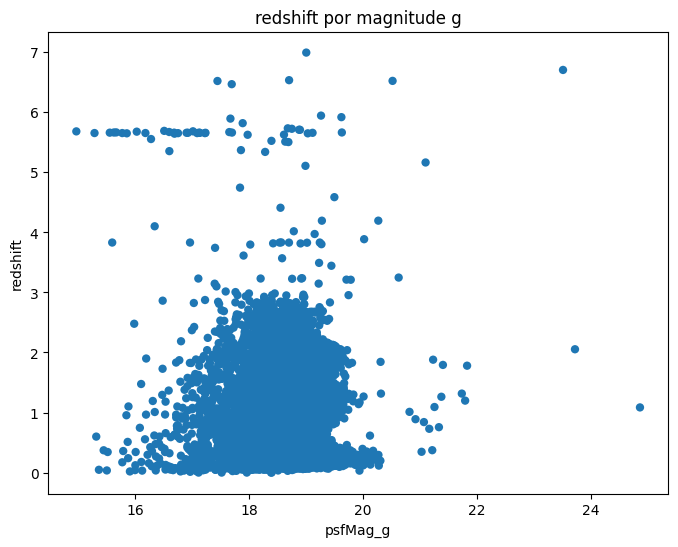

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_g', y='redshift', data=table_star, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_g')
plt.ylabel('redshift')
plt.title('redshift por magnitude g')
plt.show()

<ipython-input-31-2d4ccfaa36b4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_i', y='redshift', data=table_star, palette='Set1', edgecolor='none')


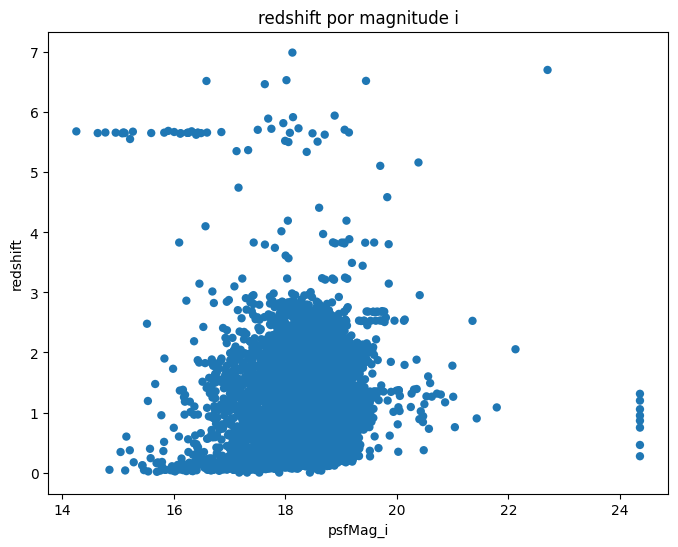

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_i', y='redshift', data=table_star, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_i')
plt.ylabel('redshift')
plt.title('redshift por magnitude i')
plt.show()

<ipython-input-32-8693c3952a75>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_r', y='redshift', data=table_star, palette='Set1', edgecolor='none')


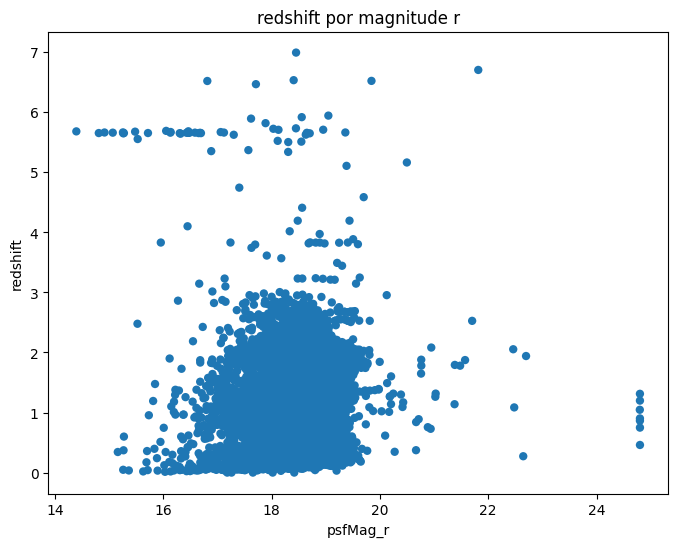

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_r', y='redshift', data=table_star, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_r')
plt.ylabel('redshift')
plt.title('redshift por magnitude r')
plt.show()

<ipython-input-33-59089ea27350>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_z', y='redshift', data=table_star, palette='Set1', edgecolor='none')


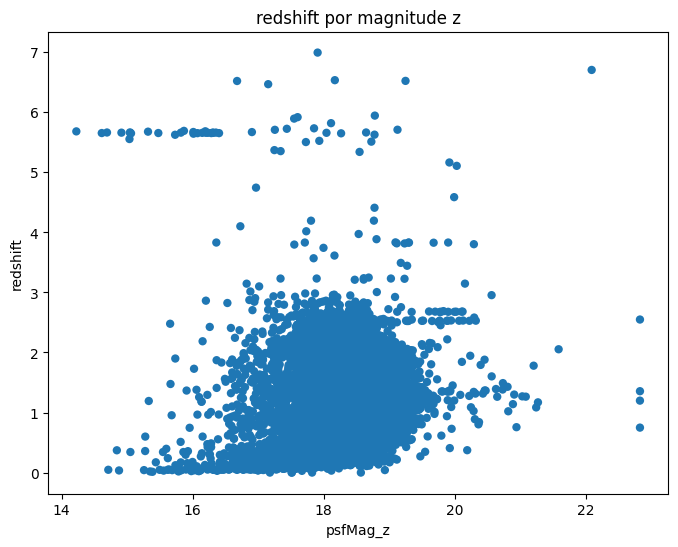

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_z', y='redshift', data=table_star, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_z')
plt.ylabel('redshift')
plt.title('redshift por magnitude z')
plt.show()

# Analise da tabela de quasares

In [ ]:
table_qso = table_qso_str[table_qso_str['class'] == classes[0]]
print(f'numero de quasares: {len(table_qso)}')

numero de quasares: 37232


## redshift em relação as magnitudes

<ipython-input-35-a24776773a19>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='redshift', y='psfMag_u', data=table_qso, palette='Set1', edgecolor='none')


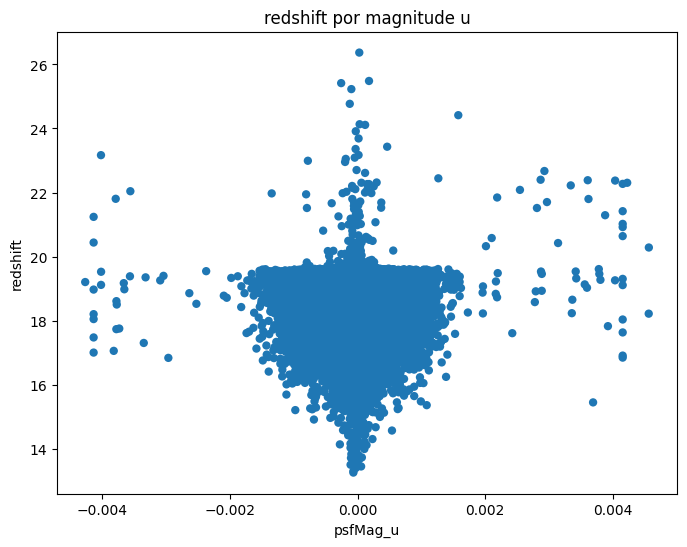

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='redshift', y='psfMag_u', data=table_qso, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_u')
plt.ylabel('redshift')
plt.title('redshift por magnitude u')
plt.show()

<ipython-input-36-860e9bcd8ab3>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_g', y='redshift', data=table_qso, palette='Set1', edgecolor='none')


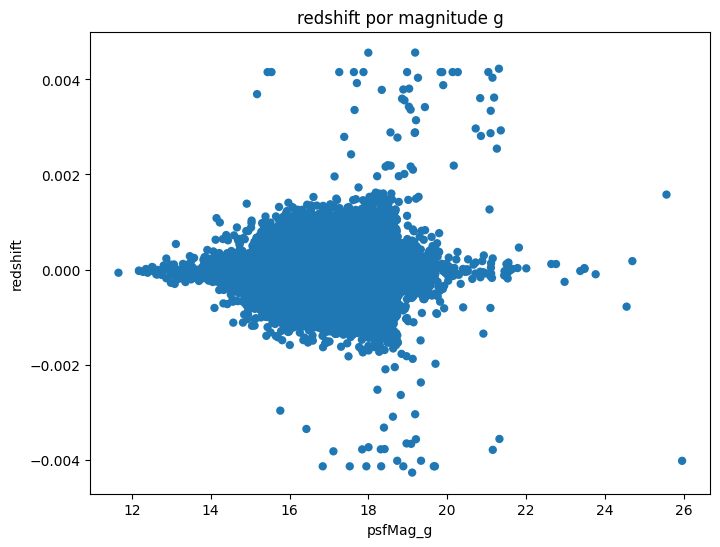

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_g', y='redshift', data=table_qso, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_g')
plt.ylabel('redshift')
plt.title('redshift por magnitude g')
plt.show()

<ipython-input-37-b923c98bffaa>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_i', y='redshift', data=table_qso, palette='Set1', edgecolor='none')


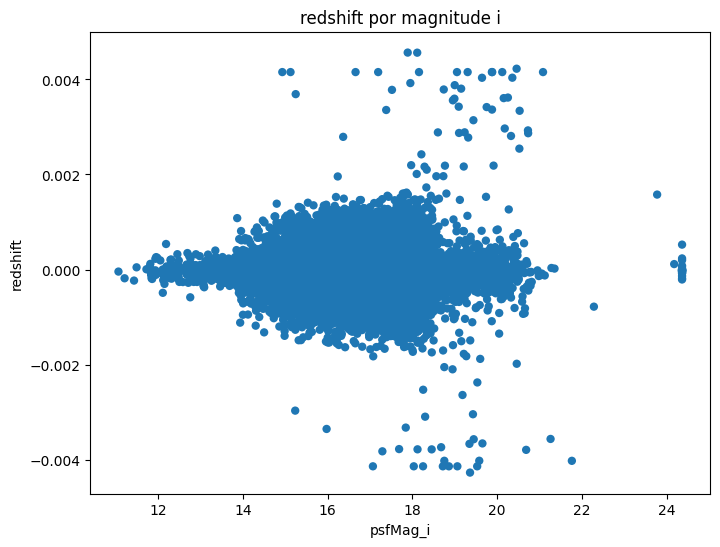

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_i', y='redshift', data=table_qso, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_i')
plt.ylabel('redshift')
plt.title('redshift por magnitude i')
plt.show()

<ipython-input-38-0e8fe6558442>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_r', y='redshift', data=table_qso, palette='Set1', edgecolor='none')


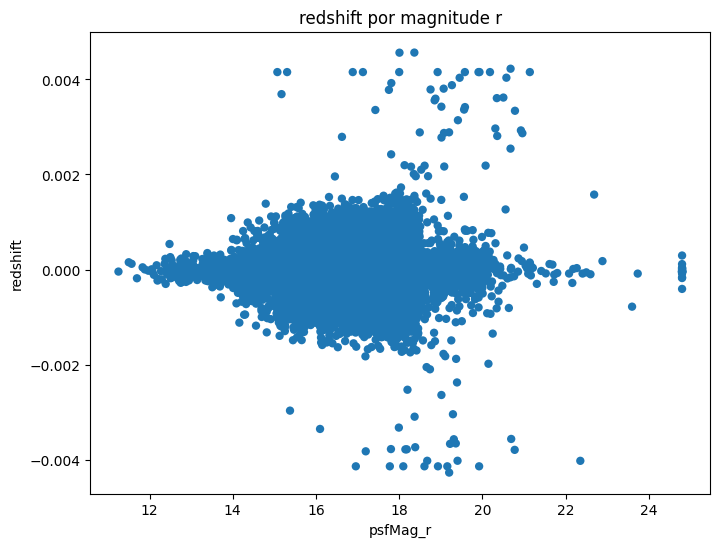

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_r', y='redshift', data=table_qso, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_r')
plt.ylabel('redshift')
plt.title('redshift por magnitude r')
plt.show()

<ipython-input-39-8bcab57a9e08>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='psfMag_z', y='redshift', data=table_qso, palette='Set1', edgecolor='none')


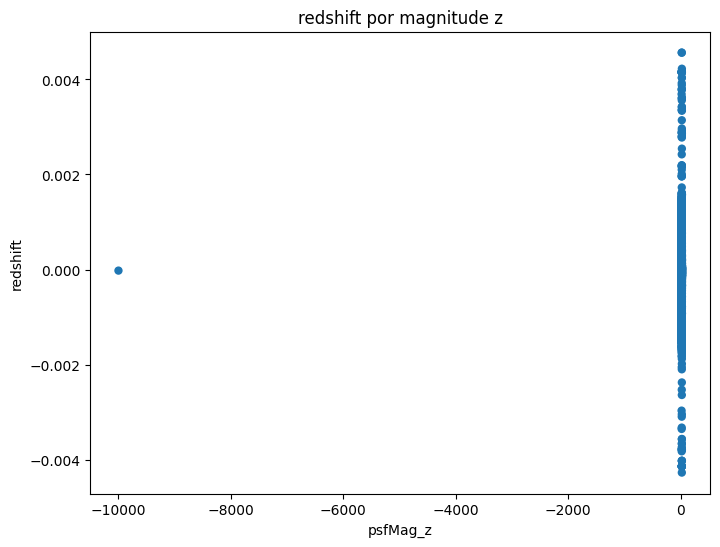

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='psfMag_z', y='redshift', data=table_qso, palette='Set1', edgecolor='none')
plt.xlabel('psfMag_z')
plt.ylabel('redshift')
plt.title('redshift por magnitude z')
plt.show()

# Teste de mapa de calor

In [ ]:
def converter_int(valor):
  if "STAR" == valor:
    return 0
  if "QSO" == valor:
    return 1
  if "GALAXY" == valor:
    return 2

In [ ]:
test_sloan_qso_star = table_qso_str
test_sloan_qso_star['class'] = table_qso_str['class'].map(converter_int)
test_sloan_qso_star.head(2000)

<ipython-input-41-8e6e76ea4292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sloan_qso_star['class'] = table_qso_str['class'].map(converter_int)


,objid,specobjid,field,redshift,ra,dec,u,g,r,i,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class
1,1.240000e+18,3.250000e+17,467,-0.000814,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,...,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,0
3,1.240000e+18,2.880000e+18,467,0.000087,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,...,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0
4,1.240000e+18,2.880000e+18,467,0.000018,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,...,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0
5,1.240000e+18,2.880000e+18,467,-0.000087,185.739708,0.746348,18.85838,17.55346,17.04644,16.84854,...,17.04058,17.56266,16.85547,16.76903,0.862006,0.823431,0.416351,0.654899,0.992346,0
6,1.240000e+18,2.880000e+18,467,-0.000091,185.713224,0.735222,18.85089,17.18911,16.54595,16.32198,...,16.55469,17.19053,16.33012,16.21988,0.999877,0.971989,0.050000,0.199957,0.636992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,1.240000e+18,3.710000e+18,88,-0.000342,253.611045,42.687576,19.48895,18.31287,17.90935,17.77170,...,17.91023,18.30163,17.78140,17.70962,0.474987,0.114872,0.711518,0.838791,0.800168,0
3024,1.240000e+18,3.710000e+18,88,-0.001012,253.614193,42.778734,19.55022,18.61949,18.20971,18.02489,...,18.19801,18.62260,18.01321,17.94631,0.349368,0.985578,0.599753,0.712441,0.102048,0
3025,1.240000e+18,9.610000e+18,88,-0.001236,253.590463,42.645368,18.80722,17.87336,17.55408,17.45890,...,17.55840,17.87434,17.47531,17.40719,0.697058,0.999927,0.919724,0.409040,0.966345,0
3027,1.240000e+18,7.110000e+17,88,1.792486,253.583323,42.721371,19.00287,18.82101,18.77536,18.52672,...,18.77254,18.82094,18.52956,18.48733,0.680564,0.999722,0.323340,0.893222,0.892314,1


In [ ]:
corr = test_sloan_qso_star.corr()
corr

,objid,specobjid,field,redshift,ra,dec,u,g,r,i,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class
objid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
specobjid,NaN,1.000000,-0.067290,-0.105612,-0.120005,0.090939,0.006626,-0.056222,-0.063686,-0.062600,...,-0.081268,-0.073410,-0.079535,-0.002724,-0.001793,0.033876,0.007939,-0.007890,-0.000254,-0.212113
field,NaN,-0.067290,1.000000,0.014115,0.130267,-0.096966,0.006668,0.030364,0.037928,0.038960,...,0.041100,0.033819,0.041688,0.006256,0.024774,-0.017598,-0.003087,0.001893,0.005022,0.028181
redshift,NaN,-0.105612,0.014115,1.000000,0.013165,0.064318,0.253016,0.485313,0.498285,0.483347,...,0.490912,0.474015,0.481050,0.016136,-0.048979,-0.034450,-0.037647,-0.029749,0.001128,0.822582
ra,NaN,-0.120005,0.130267,0.013165,1.000000,0.037633,-0.005402,0.023262,0.033094,0.036149,...,0.035613,0.025668,0.038211,0.001914,0.020029,0.006237,-0.001872,0.002148,0.000776,0.024464
dec,NaN,0.090939,-0.096966,0.064318,0.037633,1.000000,0.017105,0.072276,0.088077,0.091260,...,0.087343,0.073040,0.091714,0.006178,0.021294,0.023412,-0.035797,-0.030595,0.002924,0.082688
u,NaN,0.006626,0.006668,0.253016,-0.005402,0.017105,1.000000,0.867661,0.764814,0.719169,...,0.747487,0.840187,0.712063,0.017888,-0.217522,-0.060047,-0.073011,-0.077913,-0.004057,0.275833
g,NaN,-0.056222,0.030364,0.485313,0.023262,0.072276,0.867661,1.000000,0.965898,0.941161,...,0.949823,0.973844,0.936282,0.031073,-0.179278,-0.054557,-0.067231,-0.073808,0.001750,0.554899
r,NaN,-0.063686,0.037928,0.498285,0.033094,0.088077,0.764814,0.965898,1.000000,0.978974,...,0.976780,0.939774,0.966338,0.034298,-0.160429,-0.056992,-0.064218,-0.077220,0.003752,0.557514
i,NaN,-0.062600,0.038960,0.483347,0.036149,0.091260,0.719169,0.941161,0.978974,1.000000,...,0.952212,0.911673,0.978484,0.034881,-0.153255,-0.055986,-0.064426,-0.077313,0.004137,0.536000


<Axes: >

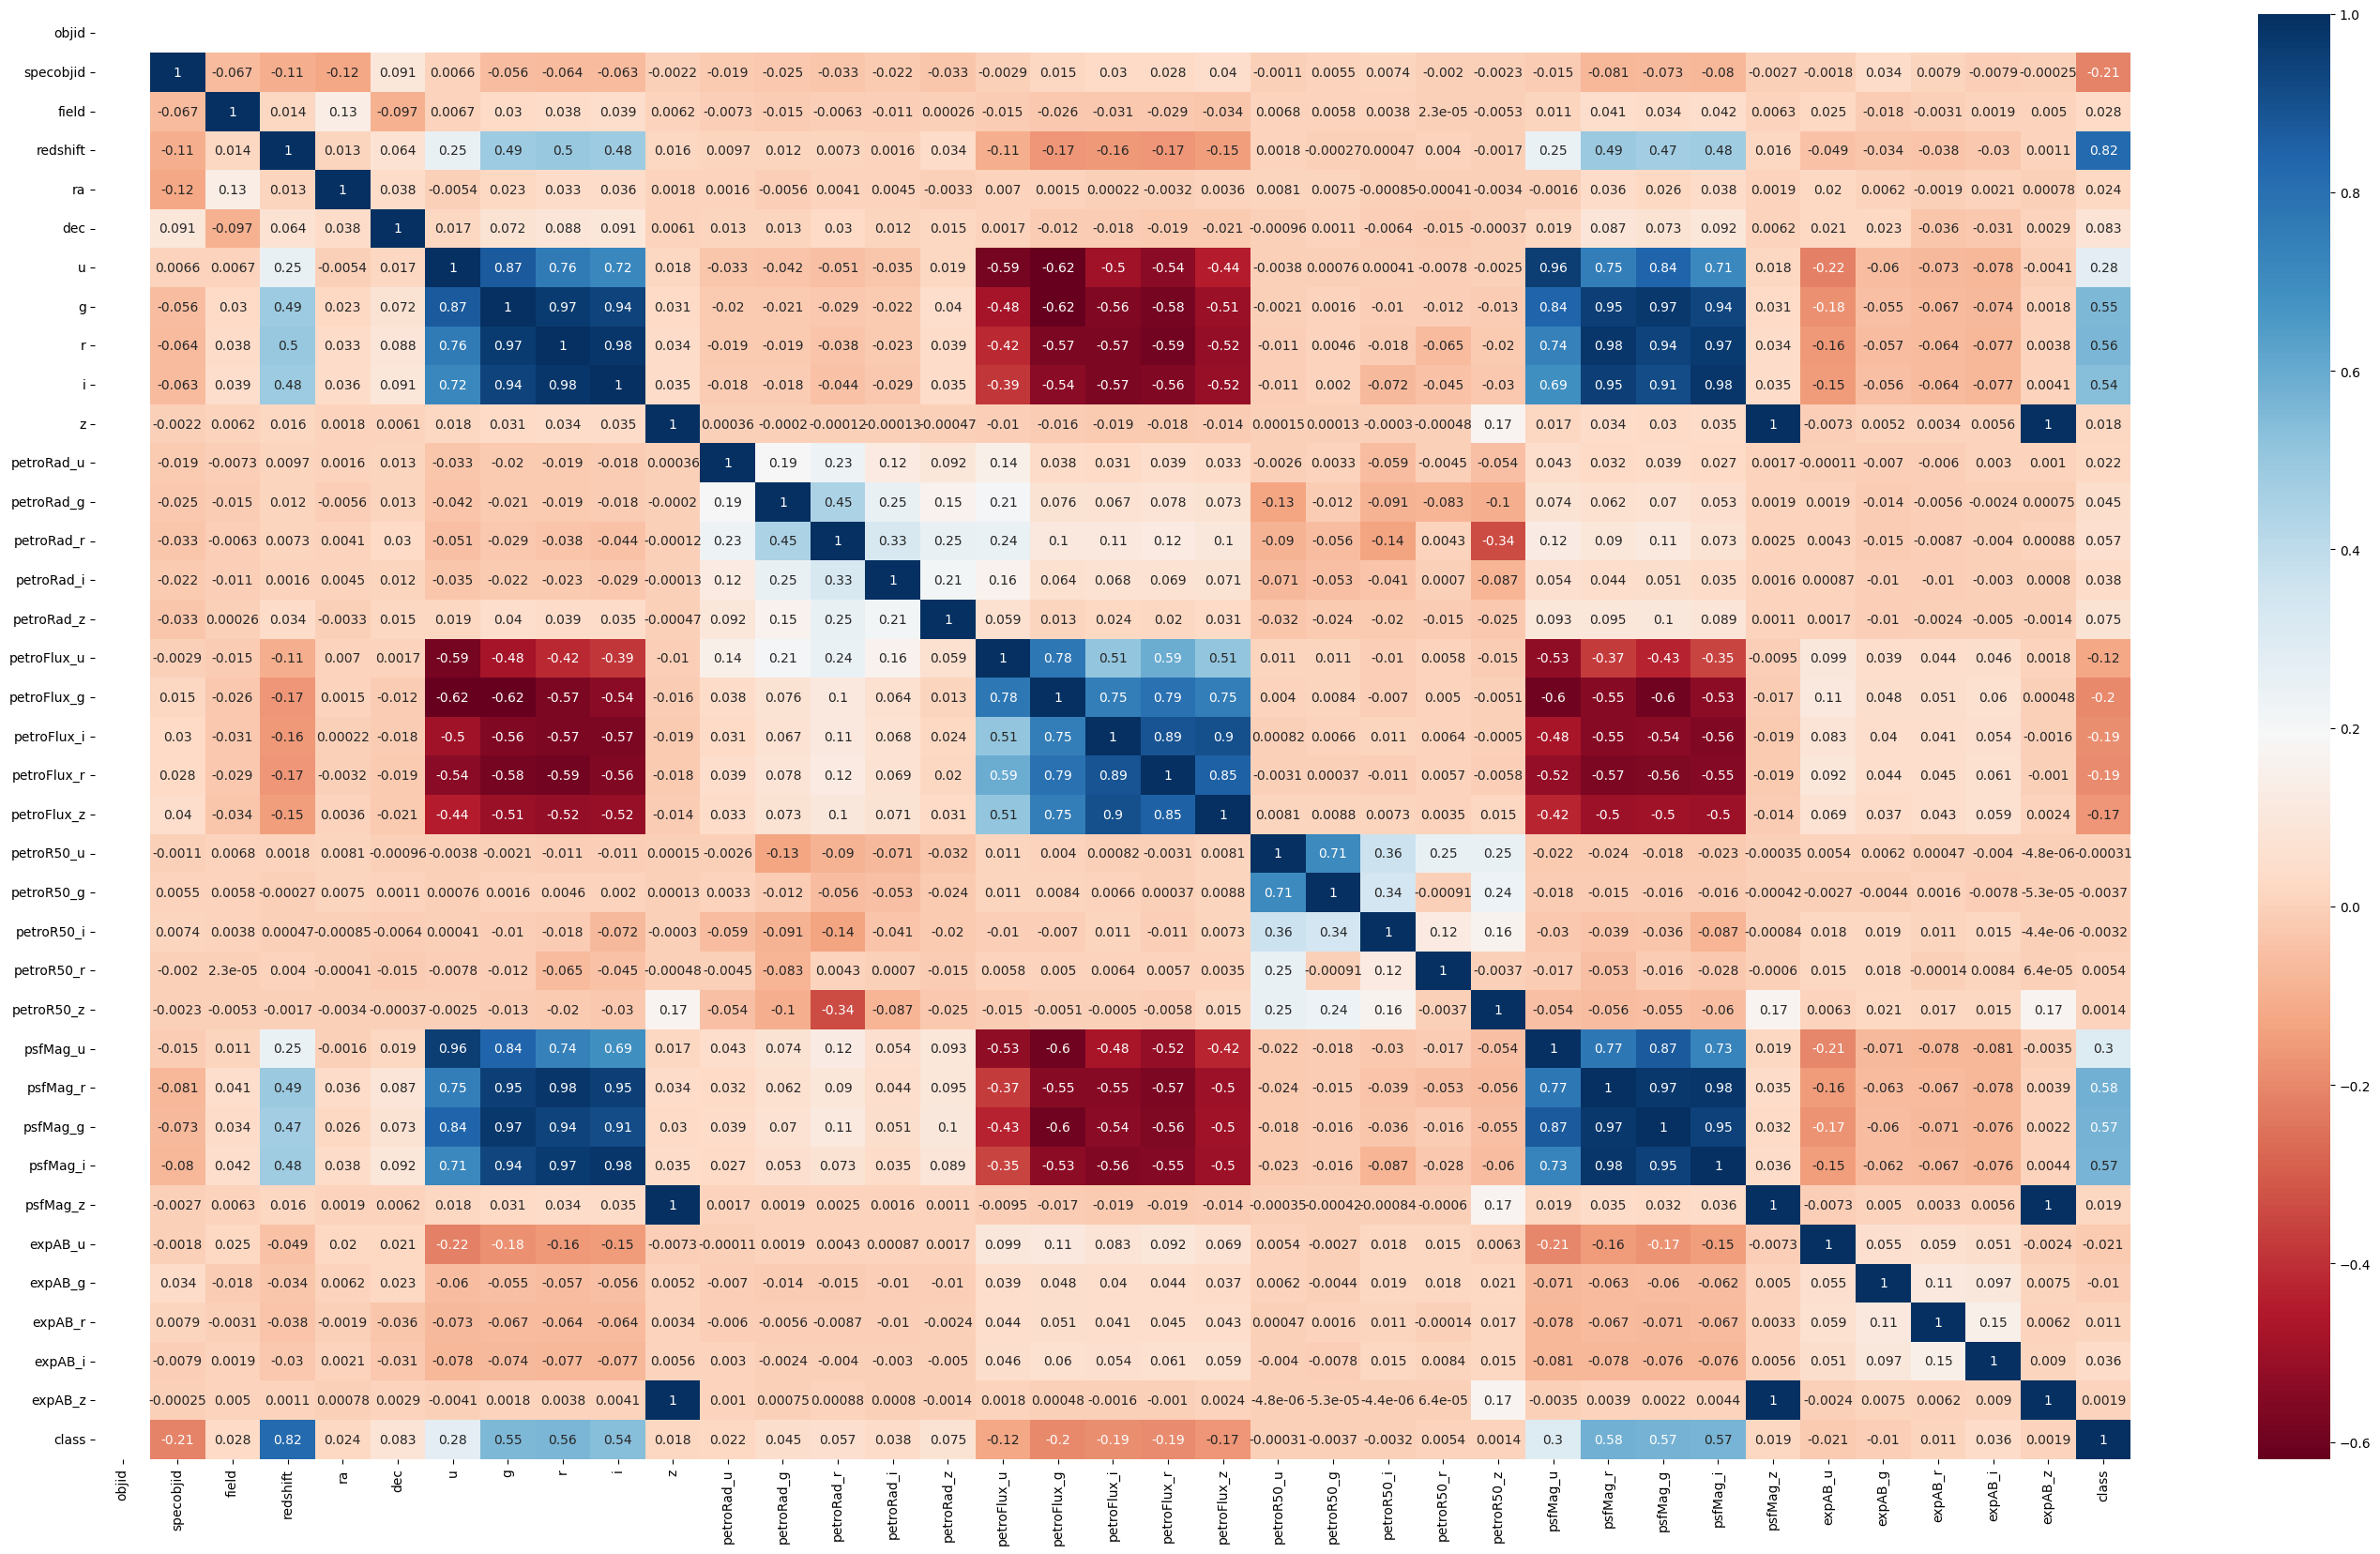

In [ ]:
plt.figure(figsize=(35,20))
sns.heatmap(corr, cmap='RdBu',annot=True)

# Filtro do dataframe

In [ ]:
sloan_filtred = sloan_table[['objid','specobjid', 'redshift','u','g','r','i','z','psfMag_u','psfMag_r','psfMag_g','psfMag_i','class']]

In [ ]:
sloan_star = sloan_filtred[sloan_filtred['class'] == 'STAR']
sloan_qso = sloan_filtred[sloan_filtred['class'] == 'QSO']
sloan_galaxy = sloan_filtred[sloan_filtred['class'] == 'GALAXY']

In [ ]:
print(f'numero de estrelas: {len(sloan_star)}')
print(f'numero de quasares: {len(sloan_qso)}')
print(f'numero de galaxias: {len(sloan_galaxy)}')

numero de estrelas: 37232
numero de quasares: 10425
numero de galaxias: 52343


In [ ]:


train, test = train_test_split(sloan_filtred,test_size=0.33, random_state=42)
train_star, test_star = train_test_split(sloan_star,test_size=0.33, random_state=42)
train_qso, test_qso = train_test_split(sloan_qso,test_size=0.33, random_state=42)
train_galaxy, test_galaxy = train_test_split(sloan_galaxy,test_size=0.33, random_state=42)


#dataset de treino do classificador
X_train = train[['u','g','r','i']]
Y_train = train[['class']]
features_name = X_train.columns.tolist()

#dataset de teste do classificador
X_test =  test[['u','g','r','i']]
Y_test =  test[['class']]

#dataset de treino do regressor para estrela
X_train_star = train_star[['u','g','r','i']]
Y_train_star = train_star[['redshift']]

#dataset de teste do regressor para estrela
X_test_star = test_star[['u','g','r','i']]
Y_test_star = test_star[['u','g','r','i','redshift']]

#dataset de treino do regressor para quasar
X_train_qso = train_qso[['u','g','r','i']]
Y_train_qso = train_qso[['redshift']]

#dataset de teste do regressor para quasar
X_test_qso = test_qso[['u','g','r','i']]
Y_test_qso = test_qso[['u','g','r','i','redshift']]

#dataset de treino do regressor para galaxia
X_train_galaxy = train_galaxy[['u','g','r','i']]
Y_train_galaxy = train_galaxy[['redshift']]

#dataset de teste do regressor para galaxia
X_test_galaxy = test_galaxy[['u','g','r','i']]
Y_test_galaxy = test_galaxy[['u','g','r','i','redshift']]

In [ ]:
type(X_train.columns)
X_train.columns

Index(['u', 'g', 'r', 'i'], dtype='object')

In [ ]:
X_train

,u,g,r,i
59428,17.88585,16.91135,16.47576,16.24609
34957,19.06011,17.69778,17.07421,16.81881
4264,17.94894,15.90111,14.93892,14.47975
53791,18.66714,17.22148,16.51698,16.10549
82114,16.85582,15.41202,14.72352,14.35581
...,...,...,...,...
6265,19.28289,17.83907,17.31170,17.13026
54886,17.64157,16.65592,16.26229,16.00887
76820,19.49428,19.14630,18.97437,18.63016
860,18.51803,17.13039,16.41701,16.03115


In [ ]:
Y_train

,class
59428,GALAXY
34957,STAR
4264,GALAXY
53791,GALAXY
82114,GALAXY
...,...
6265,STAR
54886,GALAXY
76820,QSO
860,GALAXY


# IAs Classificação

In [ ]:
pip install anchor-exp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for anchor-exp: filename=anchor_exp-0.0.2.0-py3-none-any.whl size=433501 sha256=d87d570f571020c056bb01b5300355c9e064ca11e3ba9a238bbfa1526e81b980
  Stored in directory: /root/.cache/pip/wheels/e9/53/45/7e4602020c5e5069ccef79f1389adb8efc4ca3c4d9891388bb
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=758f99fc2071613b11ad57292466f02f10d48067448751a0e55468207b64fdf2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built anchor-exp lime


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from anchor import anchor_tabular
import warnings

## KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [ ]:
classifier = neigh.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn_accuracy = classifier.score(X_test, Y_test)
print(f'acuracia do modelo knn: {knn_accuracy}')

acuracia do modelo knn: 0.9315454545454546


## MLP

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(60,50), activation='relu', solver='adam', random_state=None, max_iter=200, learning_rate='constant', learning_rate_init=0.0001).fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
predicao = clf.predict(X_test)
precisao = accuracy_score(Y_test, predicao)
print(f'acuracia do modelo mlp: {precisao}')

acuracia do modelo mlp: 0.9277878787878788


In [ ]:
def anchor_explanation(model, X_train, X_test):
  warnings.filterwarnings("ignore", category=UserWarning)

  features_name = X_train.columns.tolist()

  explainer = anchor_tabular.AnchorTabularExplainer(["STAR", "QSO"], features_name, X_train.values)

  #for index in range(len(X_test)):
    #exp = explainer.explain_instance(X_test.iloc[[index]].values, model.predict, threshold=0.90)
    #print(exp.names())
  exp = explainer.explain_instance(X_test.iloc[[4]].values, model.predict, threshold=0.90)
  warnings.filterwarnings("default")

  return exp


In [ ]:
exp = anchor_explanation(clf, X_train, X_test)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())
#print(exp.names())



Anchor: i > 17.31 AND u <= 19.27
Precision: 0.85
Coverage: 0.13


In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

explainer = anchor_tabular.AnchorTabularExplainer(['0', '1'], features_name, X_train.values)
#prediction_index = int(clf.predict(X_test.iloc[[0]]).astype(int))
#print('Prediction: ', explainer.class_names[prediction_index])
exp = explainer.explain_instance(X_test.iloc[[4]].values, clf.predict, threshold=0.90)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())
#exp.show_in_notebook()

warnings.filterwarnings("default")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Anchor: i > 17.31 AND u <= 19.27
Precision: 0.87
Coverage: 0.15


## DecisionTree

In [ ]:
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#tree.plot_tree(model_tree)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
prediction = model_tree.predict(X_test)
prediction

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'STAR', 'GALAXY'],
      dtype=object)

In [ ]:
precisao = accuracy_score(Y_test, prediction)
print(f'acuracia da arvore de decisão: {precisao}')

acuracia da arvore de decisão: 0.9042424242424243


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
exp = anchor_explanation(model_tree, X_train, X_test)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Anchor: g > 18.05 AND 18.88 < u <= 19.27
Precision: 0.65
Coverage: 0.08


## SDG

In [ ]:
sdg = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
model = sdg.fit(X_train, Y_train)
prediction = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
precisao = accuracy_score(Y_test,prediction)
print(f'acuracia do SGD: {precisao}')

acuracia do SGD: 0.8917272727272727


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
exp = anchor_explanation(model, X_train, X_test)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Anchor: i > 17.31 AND u <= 19.27
Precision: 0.91
Coverage: 0.15


## GradientBoost

In [ ]:
est = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, Y_train)
prediction = est.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
precisao = accuracy_score(Y_test,prediction)
print(f'acuracia do GradientBoosting: {precisao}')

acuracia do GradientBoosting: 0.7388787878787879


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
exp = anchor_explanation(est, X_train, X_test)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Anchor: i > 17.31 AND u <= 19.27
Precision: 0.85
Coverage: 0.15


# IAs Regressão

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Regressão em estrelas

In [ ]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model_svr = svr.fit(X_train_star,Y_train_star)
prediction_svr = model_svr.predict(X_test_star)
Y_test_star_svr = Y_test_star
Y_test_star_svr['predicao'] = prediction_svr
Y_test_star_svr

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-73-b03fce340d19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_star_svr['predicao'] = prediction_svr


,u,g,r,i,redshift,predicao
25032,17.77697,16.55500,16.15534,16.02313,-0.000129,0.000148
14932,18.71210,16.85819,16.13144,15.86705,0.000018,0.000148
6319,16.92612,15.73617,15.27673,15.12612,0.000094,0.000148
99604,17.90597,16.97449,16.68824,16.56905,0.000063,0.000148
8351,18.49935,17.30332,16.92448,16.79682,0.000177,0.000148
...,...,...,...,...,...,...
76850,19.07719,17.94966,17.47699,17.30064,-0.000027,0.000148
804,18.48808,17.27187,16.74018,16.67748,0.000281,0.000148
25920,18.69705,17.76462,17.47124,17.35825,0.000020,0.000148
6473,19.57012,18.15394,17.60240,17.38605,-0.000023,0.000148


In [ ]:
mse_svr = mean_squared_error(Y_test_star_svr['redshift'], Y_test_star_svr['predicao'])
mae_svr = mean_absolute_error(Y_test_star_svr['redshift'], Y_test_star_svr['predicao'])
print(f'Erro Quadratico Medio: {mse_svr}')
print(f'Erro Médio Absoluto: {mae_svr}')

Erro Quadratico Medio: 1.9670317461231348e-07
Erro Médio Absoluto: 0.0003210584734760342


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
decTree = DecisionTreeRegressor(random_state=0)
model_decTree = decTree.fit(X_train_star,Y_train_star)
prediction_decTree = model_decTree.predict(X_test_star)
Y_test_star_decTree = Y_test_star
Y_test_star_decTree['predicao'] = prediction_decTree
Y_test_star_decTree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-75-ea522c98ac51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_star_decTree['predicao'] = prediction_decTree


,u,g,r,i,redshift,predicao
25032,17.77697,16.55500,16.15534,16.02313,-0.000129,0.000260
14932,18.71210,16.85819,16.13144,15.86705,0.000018,0.000215
6319,16.92612,15.73617,15.27673,15.12612,0.000094,0.000058
99604,17.90597,16.97449,16.68824,16.56905,0.000063,0.000082
8351,18.49935,17.30332,16.92448,16.79682,0.000177,0.000459
...,...,...,...,...,...,...
76850,19.07719,17.94966,17.47699,17.30064,-0.000027,-0.000031
804,18.48808,17.27187,16.74018,16.67748,0.000281,0.000418
25920,18.69705,17.76462,17.47124,17.35825,0.000020,0.000217
6473,19.57012,18.15394,17.60240,17.38605,-0.000023,-0.000130


In [ ]:
mse_decTree = mean_squared_error(Y_test_star_decTree['redshift'], Y_test_star_decTree['predicao'])
mae_decTree = mean_absolute_error(Y_test_star_decTree['redshift'], Y_test_star_decTree['predicao'])
print(f'Erro Quadratico Medio: {mse_decTree}')
print(f'Erro Médio Absoluto: {mae_decTree}')

Erro Quadratico Medio: 3.3016061757036467e-07
Erro Médio Absoluto: 0.00039458097201106865


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ranForest = RandomForestRegressor(max_depth=2, random_state=0)
model_ranForest = ranForest.fit(X_train_star,Y_train_star)
prediction_ranForest = model_ranForest.predict(X_test_star)
Y_test_star_ranForest = Y_test_star
Y_test_star_ranForest['predicao'] = prediction_ranForest
Y_test_star_ranForest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
<ipython-input-77-c472083e6dac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_star_ranForest['predicao'] = prediction_ranFores

,u,g,r,i,redshift,predicao
25032,17.77697,16.55500,16.15534,16.02313,-0.000129,-0.000036
14932,18.71210,16.85819,16.13144,15.86705,0.000018,-0.000034
6319,16.92612,15.73617,15.27673,15.12612,0.000094,-0.000036
99604,17.90597,16.97449,16.68824,16.56905,0.000063,-0.000036
8351,18.49935,17.30332,16.92448,16.79682,0.000177,-0.000036
...,...,...,...,...,...,...
76850,19.07719,17.94966,17.47699,17.30064,-0.000027,-0.000037
804,18.48808,17.27187,16.74018,16.67748,0.000281,-0.000036
25920,18.69705,17.76462,17.47124,17.35825,0.000020,-0.000037
6473,19.57012,18.15394,17.60240,17.38605,-0.000023,-0.000037


In [ ]:
mse_ranForest = mean_squared_error(Y_test_star_ranForest['redshift'], Y_test_star_ranForest['predicao'])
mae_ranForest = mean_absolute_error(Y_test_star_ranForest['redshift'], Y_test_star_ranForest['predicao'])
print(f'Erro Quadratico Medio: {mse_ranForest}')
print(f'Erro Médio Absoluto: {mae_ranForest}')

Erro Quadratico Medio: 1.597729051468589e-07
Erro Médio Absoluto: 0.00026823104698576284


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
model_gbr = gbr.fit(X_train_star,Y_train_star)
prediction_gbr = model_gbr.predict(X_test_star)
Y_test_star_gbr = Y_test_star
Y_test_star_gbr['predicao'] = prediction_gbr
Y_test_star_gbr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-79-e2707bd8b97d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_star_gbr['predicao'] = prediction_gbr


,u,g,r,i,redshift,predicao
25032,17.77697,16.55500,16.15534,16.02313,-0.000129,-0.000033
14932,18.71210,16.85819,16.13144,15.86705,0.000018,-0.000032
6319,16.92612,15.73617,15.27673,15.12612,0.000094,-0.000050
99604,17.90597,16.97449,16.68824,16.56905,0.000063,-0.000043
8351,18.49935,17.30332,16.92448,16.79682,0.000177,-0.000066
...,...,...,...,...,...,...
76850,19.07719,17.94966,17.47699,17.30064,-0.000027,-0.000042
804,18.48808,17.27187,16.74018,16.67748,0.000281,-0.000045
25920,18.69705,17.76462,17.47124,17.35825,0.000020,-0.000045
6473,19.57012,18.15394,17.60240,17.38605,-0.000023,-0.000042


In [ ]:
mse_gbr = mean_squared_error(Y_test_star_gbr['redshift'], Y_test_star_gbr['predicao'])
mae_gbr = mean_absolute_error(Y_test_star_gbr['redshift'], Y_test_star_gbr['predicao'])
print(f'Erro Quadratico Medio: {mse_gbr}')
print(f'Erro Médio Absoluto: {mae_gbr}')

Erro Quadratico Medio: 1.6093637119128776e-07
Erro Médio Absoluto: 0.00026931588753928843


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
knnr = KNeighborsRegressor(n_neighbors=2)
model_knnr = knnr.fit(X_train_star,Y_train_star)
prediction_knnr = model_knnr.predict(X_test_star)
Y_test_star_knnr = Y_test_star
Y_test_star_knnr['predicao'] = prediction_knnr
Y_test_star_knnr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-81-9766c522cdbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_star_knnr['predicao'] = prediction_knnr


,u,g,r,i,redshift,predicao
25032,17.77697,16.55500,16.15534,16.02313,-0.000129,-0.000044
14932,18.71210,16.85819,16.13144,15.86705,0.000018,0.000065
6319,16.92612,15.73617,15.27673,15.12612,0.000094,-0.000050
99604,17.90597,16.97449,16.68824,16.56905,0.000063,-0.000068
8351,18.49935,17.30332,16.92448,16.79682,0.000177,-0.000009
...,...,...,...,...,...,...
76850,19.07719,17.94966,17.47699,17.30064,-0.000027,0.000336
804,18.48808,17.27187,16.74018,16.67748,0.000281,-0.000322
25920,18.69705,17.76462,17.47124,17.35825,0.000020,-0.000564
6473,19.57012,18.15394,17.60240,17.38605,-0.000023,-0.000307


In [ ]:
mse_knnr = mean_squared_error(Y_test_star_knnr['redshift'], Y_test_star_knnr['predicao'])
mae_knnr = mean_absolute_error(Y_test_star_knnr['redshift'], Y_test_star_knnr['predicao'])
print(f'Erro Quadratico Medio: {mse_knnr}')
print(f'Erro Médio Absoluto: {mae_knnr}')

Erro Quadratico Medio: 2.3122521464908385e-07
Erro Médio Absoluto: 0.0003334772350858631


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Regressão em quasares

In [ ]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model_svr = svr.fit(X_train_qso,Y_train_qso)
prediction_svr = model_svr.predict(X_test_qso)
Y_test_qso_svr = Y_test_qso
Y_test_qso_svr['predicao'] = prediction_svr
Y_test_qso_svr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-83-7a8dfe7eae6f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_qso_svr['predicao'] = prediction_svr


,u,g,r,i,redshift,predicao
99304,19.05671,18.52453,17.96267,17.55100,0.168676,0.503876
64702,19.10244,19.07767,18.96928,19.08059,1.005545,1.223877
21456,19.44733,19.29047,19.03717,18.65652,1.868681,1.503510
62539,18.82456,18.66302,18.72841,18.57265,1.690154,1.370360
42310,19.48330,19.30898,19.25332,19.25595,0.750860,1.214574
...,...,...,...,...,...,...
41081,18.65456,18.62017,18.48220,18.46498,0.300739,1.305295
69982,19.44701,18.97635,19.04934,18.90910,0.686980,1.231299
11538,19.57021,19.36142,19.27387,19.21480,2.079938,1.293652
3240,18.33417,18.20710,18.11429,17.92545,1.942133,1.401734


In [ ]:
decTree = DecisionTreeRegressor(random_state=0)
model_decTree = decTree.fit(X_train_qso,Y_train_qso)
prediction_decTree = model_decTree.predict(X_test_qso)
Y_test_qso_decTree = Y_test_qso
Y_test_qso_decTree['predicao'] = prediction_decTree
Y_test_qso_decTree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-84-01e19b019ec2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_qso_decTree['predicao'] = prediction_decTree


,u,g,r,i,redshift,predicao
99304,19.05671,18.52453,17.96267,17.55100,0.168676,0.208437
64702,19.10244,19.07767,18.96928,19.08059,1.005545,0.965189
21456,19.44733,19.29047,19.03717,18.65652,1.868681,1.862137
62539,18.82456,18.66302,18.72841,18.57265,1.690154,0.465407
42310,19.48330,19.30898,19.25332,19.25595,0.750860,0.821846
...,...,...,...,...,...,...
41081,18.65456,18.62017,18.48220,18.46498,0.300739,0.298761
69982,19.44701,18.97635,19.04934,18.90910,0.686980,0.625173
11538,19.57021,19.36142,19.27387,19.21480,2.079938,1.185562
3240,18.33417,18.20710,18.11429,17.92545,1.942133,1.782895


In [ ]:
ranForest = RandomForestRegressor(max_depth=2, random_state=0)
model_ranForest = ranForest.fit(X_train_qso,Y_train_qso)
prediction_ranForest = model_ranForest.predict(X_test_qso)
Y_test_qso_ranForest = Y_test_qso
Y_test_qso_ranForest['predicao'] = prediction_ranForest
Y_test_qso_ranForest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
<ipython-input-85-0ab465189132>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_qso_ranForest['predicao'] = prediction_ranForest

,u,g,r,i,redshift,predicao
99304,19.05671,18.52453,17.96267,17.55100,0.168676,0.562549
64702,19.10244,19.07767,18.96928,19.08059,1.005545,1.260749
21456,19.44733,19.29047,19.03717,18.65652,1.868681,1.260749
62539,18.82456,18.66302,18.72841,18.57265,1.690154,1.260749
42310,19.48330,19.30898,19.25332,19.25595,0.750860,1.555073
...,...,...,...,...,...,...
41081,18.65456,18.62017,18.48220,18.46498,0.300739,1.260749
69982,19.44701,18.97635,19.04934,18.90910,0.686980,1.260749
11538,19.57021,19.36142,19.27387,19.21480,2.079938,1.576909
3240,18.33417,18.20710,18.11429,17.92545,1.942133,1.260749


In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
model_gbr = gbr.fit(X_train_qso,Y_train_qso)
prediction_gbr = model_gbr.predict(X_test_qso)
Y_test_qso_gbr = Y_test_qso
Y_test_qso_gbr['predicao'] = prediction_gbr
Y_test_qso_gbr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-86-86c26d28792d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_qso_gbr['predicao'] = prediction_gbr


,u,g,r,i,redshift,predicao
99304,19.05671,18.52453,17.96267,17.55100,0.168676,0.633315
64702,19.10244,19.07767,18.96928,19.08059,1.005545,1.245323
21456,19.44733,19.29047,19.03717,18.65652,1.868681,1.421874
62539,18.82456,18.66302,18.72841,18.57265,1.690154,1.275396
42310,19.48330,19.30898,19.25332,19.25595,0.750860,1.248185
...,...,...,...,...,...,...
41081,18.65456,18.62017,18.48220,18.46498,0.300739,1.304148
69982,19.44701,18.97635,19.04934,18.90910,0.686980,1.181180
11538,19.57021,19.36142,19.27387,19.21480,2.079938,1.404167
3240,18.33417,18.20710,18.11429,17.92545,1.942133,1.200262


In [ ]:
knnr = KNeighborsRegressor(n_neighbors=2)
model_knnr = knnr.fit(X_train_qso,Y_train_qso)
prediction_knnr = model_knnr.predict(X_test_qso)
Y_test_qso_knnr = Y_test_qso
Y_test_qso_knnr['predicao'] = prediction_knnr
Y_test_qso_knnr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-87-ea547b0520c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_qso_knnr['predicao'] = prediction_knnr


,u,g,r,i,redshift,predicao
99304,19.05671,18.52453,17.96267,17.55100,0.168676,0.197819
64702,19.10244,19.07767,18.96928,19.08059,1.005545,1.096174
21456,19.44733,19.29047,19.03717,18.65652,1.868681,1.043464
62539,18.82456,18.66302,18.72841,18.57265,1.690154,0.457873
42310,19.48330,19.30898,19.25332,19.25595,0.750860,0.848534
...,...,...,...,...,...,...
41081,18.65456,18.62017,18.48220,18.46498,0.300739,0.855608
69982,19.44701,18.97635,19.04934,18.90910,0.686980,0.578455
11538,19.57021,19.36142,19.27387,19.21480,2.079938,2.090433
3240,18.33417,18.20710,18.11429,17.92545,1.942133,1.664049


## Regressão em galaxias

In [ ]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model_svr = svr.fit(X_train_galaxy,Y_train_galaxy)
prediction_svr = model_svr.predict(X_test_galaxy)
Y_test_galaxy_svr = Y_test_galaxy
Y_test_galaxy_svr['predicao'] = prediction_svr
Y_test_galaxy_svr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-88-2a9edfb7e5f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_galaxy_svr['predicao'] = prediction_svr


,u,g,r,i,redshift,predicao
26170,19.02550,17.69969,17.27426,17.01996,0.038833,0.200279
84465,18.11121,16.30806,15.62898,15.28812,0.041606,0.198922
52490,18.80836,17.71470,17.23359,16.92748,0.056010,0.200349
14956,18.85544,17.00056,16.10009,15.66844,0.053573,0.193106
67832,18.35622,17.33268,16.85002,16.48591,0.045004,0.200929
...,...,...,...,...,...,...
99173,19.44676,17.51617,16.62272,16.17521,0.055663,0.197979
47035,17.71111,16.52964,16.00446,15.66081,0.055684,0.202040
5206,18.49817,17.21973,16.79501,16.49658,0.055130,0.198168
62331,18.92919,16.97536,16.07895,15.64174,0.067351,0.192820


In [ ]:
decTree = DecisionTreeRegressor(random_state=0)
model_decTree = decTree.fit(X_train_galaxy,Y_train_galaxy)
prediction_decTree = model_decTree.predict(X_test_galaxy)
Y_test_galaxy_decTree = Y_test_galaxy
Y_test_galaxy_decTree['predicao'] = prediction_decTree
Y_test_galaxy_decTree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-89-f0f16b633f0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_galaxy_decTree['predicao'] = prediction_decTree


,u,g,r,i,redshift,predicao
26170,19.02550,17.69969,17.27426,17.01996,0.038833,0.039079
84465,18.11121,16.30806,15.62898,15.28812,0.041606,0.081332
52490,18.80836,17.71470,17.23359,16.92748,0.056010,0.051987
14956,18.85544,17.00056,16.10009,15.66844,0.053573,0.081452
67832,18.35622,17.33268,16.85002,16.48591,0.045004,0.083621
...,...,...,...,...,...,...
99173,19.44676,17.51617,16.62272,16.17521,0.055663,0.064996
47035,17.71111,16.52964,16.00446,15.66081,0.055684,0.057432
5206,18.49817,17.21973,16.79501,16.49658,0.055130,0.036575
62331,18.92919,16.97536,16.07895,15.64174,0.067351,0.066621


In [ ]:
ranForest = RandomForestRegressor(max_depth=2, random_state=0)
model_ranForest = ranForest.fit(X_train_galaxy,Y_train_galaxy)
prediction_ranForest = model_ranForest.predict(X_test_galaxy)
Y_test_galaxy_ranForest = Y_test_galaxy
Y_test_galaxy_ranForest['predicao'] = prediction_ranForest
Y_test_galaxy_ranForest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
<ipython-input-90-4712f2d810ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_galaxy_ranForest['predicao'] = prediction_ranFor

,u,g,r,i,redshift,predicao
26170,19.02550,17.69969,17.27426,17.01996,0.038833,0.090639
84465,18.11121,16.30806,15.62898,15.28812,0.041606,0.062465
52490,18.80836,17.71470,17.23359,16.92748,0.056010,0.075417
14956,18.85544,17.00056,16.10009,15.66844,0.053573,0.077461
67832,18.35622,17.33268,16.85002,16.48591,0.045004,0.066028
...,...,...,...,...,...,...
99173,19.44676,17.51617,16.62272,16.17521,0.055663,0.090639
47035,17.71111,16.52964,16.00446,15.66081,0.055684,0.043849
5206,18.49817,17.21973,16.79501,16.49658,0.055130,0.066028
62331,18.92919,16.97536,16.07895,15.64174,0.067351,0.086375


In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
model_gbr = gbr.fit(X_train_galaxy,Y_train_galaxy)
prediction_gbr = model_gbr.predict(X_test_galaxy)
Y_test_galaxy_gbr = Y_test_galaxy
Y_test_galaxy_gbr['predicao'] = prediction_gbr
Y_test_galaxy_gbr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-91-082cea3b21d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_galaxy_gbr['predicao'] = prediction_gbr


,u,g,r,i,redshift,predicao
26170,19.02550,17.69969,17.27426,17.01996,0.038833,0.060478
84465,18.11121,16.30806,15.62898,15.28812,0.041606,0.059273
52490,18.80836,17.71470,17.23359,16.92748,0.056010,0.067578
14956,18.85544,17.00056,16.10009,15.66844,0.053573,0.077485
67832,18.35622,17.33268,16.85002,16.48591,0.045004,0.062265
...,...,...,...,...,...,...
99173,19.44676,17.51617,16.62272,16.17521,0.055663,0.088045
47035,17.71111,16.52964,16.00446,15.66081,0.055684,0.049128
5206,18.49817,17.21973,16.79501,16.49658,0.055130,0.062036
62331,18.92919,16.97536,16.07895,15.64174,0.067351,0.080083


In [ ]:
knnr = KNeighborsRegressor(n_neighbors=2)
model_knnr = knnr.fit(X_train_galaxy,Y_train_galaxy)
prediction_knnr = model_knnr.predict(X_test_galaxy)
Y_test_galaxy_knnr = Y_test_galaxy
Y_test_galaxy_knnr['predicao'] = prediction_knnr
Y_test_galaxy_knnr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-92-25fc20dad420>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_galaxy_knnr['predicao'] = prediction_knnr


,u,g,r,i,redshift,predicao
26170,19.02550,17.69969,17.27426,17.01996,0.038833,0.045351
84465,18.11121,16.30806,15.62898,15.28812,0.041606,0.060652
52490,18.80836,17.71470,17.23359,16.92748,0.056010,0.066529
14956,18.85544,17.00056,16.10009,15.66844,0.053573,0.069056
67832,18.35622,17.33268,16.85002,16.48591,0.045004,0.047862
...,...,...,...,...,...,...
99173,19.44676,17.51617,16.62272,16.17521,0.055663,0.069199
47035,17.71111,16.52964,16.00446,15.66081,0.055684,0.055998
5206,18.49817,17.21973,16.79501,16.49658,0.055130,0.052089
62331,18.92919,16.97536,16.07895,15.64174,0.067351,0.059176
